In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

C:\tools\Anaconda3\envs\tf\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
def read_training_images(train_files, train_dir):
    """
    A method that reads the training image files in a given directory and returns the list of all images as numpy arrays
    """

    images=[]
    n=0
    for img_name in train_files.file_name:
        image_path = os.path.join(train_dir, img_name)
        img = cv2.imread(image_path)
        # img = np.expand_dims(cv2.resize(img, dsize=(COLS, ROWS), interpolation=cv2.INTER_CUBIC), axis=2)
        # .flatten()
        # print(n)
        # print(type(img))
        # print(img.shape)
        # cv2.imshow('image', img)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        img = img.astype('float32')
        images.append(img)
        n+=1
    print("Number of training images read = {}".format(n))

    return images

In [3]:
def read_testing_images(directory):
    """
    A method that reads the test image files in a given directory and returns the list of all images as numpy arrays
    """
    files = os.listdir(directory)

    images=[]
    m=0
    for fil in files:
        image_path = os.path.join(directory, fil)
        img = cv2.imread(image_path)
        # img = np.expand_dims(cv2.resize(img, dsize=(COLS, ROWS), interpolation=cv2.INTER_CUBIC), axis=2)
        img = img.astype('float32')
        images.append(img)
        m+=1
    print("Number of testing images read = {}".format(m))

    return images

In [4]:
def custom_model(layer1_size, layer2_size, layer3_size, dropout):
    
    # initialize the model from the keras library   
#     custom_model = tf.keras.applications.VGG19(include_top=False,
#                                          weights="imagenet",
#                                          input_shape=(480, 640, 3),
#                                          classes=5)
    
    
    # initialize the VGG16 model from the keras library
    custom_model = tf.keras.applications.VGG16(include_top=False,
                                              weights="imagenet",
                                              input_shape=(480, 640, 3),
                                              classes=5)
    
    model = tf.keras.Sequential()   
    
#     custom_model.summary()

    # Freeze the layers
    custom_model.trainable = False
    
    model.add(custom_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(layer1_size, activation="relu"))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(layer2_size, activation="relu"))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(layer3_size, activation="relu"))
    model.add(tf.keras.layers.Dropout(dropout))

    # Add 'softmax' instead of earlier 'prediction' layer.
    model.add(tf.keras.layers.Dense(5, activation='softmax'))

    return model

In [5]:
def generate_plots(model_history, epochs):
    """
    A method that takes the model history of a trained model and plots its:
    1. Training accuracy
    2. Training loss
    3. Validation accuracy
    4. Validation loss
    """
    acc = model_history.history['acc']
    val_acc = model_history.history['val_acc']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']


    plt.figure(1)
    plt.suptitle('Accuracy learning curve', fontsize=20)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)
    plt.plot(acc, label='training accuracy')
    plt.plot(val_acc, label='validation accuracy')
    plt.xticks(np.arange(0, epochs + epochs/10, epochs/10))
    plt.legend(loc="lower right")
    plt.savefig("accuracy.png", dpi=300)

    plt.figure(2)
    plt.suptitle('Loss learning curve', fontsize=20)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel('loss', fontsize=14)
    plt.plot(loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xticks(np.arange(0, epochs + epochs/10, epochs/10))
    plt.legend(loc="upper right")
    plt.savefig("loss.png", dpi=300)

In [6]:
def best_results(model_history):
    """
    A method that prints the best validation accuracy and loss to a best_results.txt file.
    """
    acc = model_history.history['acc']
    val_acc = model_history.history['val_acc']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    
    f = open("best_results.txt", "w+")
    f.write("Training accuracy = {}\n".format(acc))
    f.write("----------------------\n")
    f.write("Training loss = {}\n".format(loss))
    f.write("----------------------\n")
    f.write("Validation accuracy = {}\n".format(val_acc))
    f.write("----------------------\n")
    f.write("Validation loss = {}\n".format(val_loss))
    f.write("----------------------\n")
    f.write("----------------------\n\n")
    f.close()

In [7]:
save_model = "saved_models"
os.makedirs(save_model, exist_ok=True)

# Initialize the directories
root_dir = os.path.abspath('./')
train_dir = os.path.join(root_dir, 'Training')
test_dir = os.path.join(root_dir, 'Project_C2_Testing')
model_save_dir = os.path.join(root_dir, save_model)


train_files = pd.read_csv(os.path.join(root_dir, 'train_files.csv'))

# set constants
COLS, ROWS, CHANNEL = 480, 640, 3

# read the training and testing images
training_images = read_training_images(train_files, train_dir)
testing_images = read_testing_images(test_dir)


X_train = np.stack(training_images)
y_train = train_files.annotation.values
X_test = np.stack(testing_images)


# Split the training data in training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=None, shuffle=True, stratify=y_train)

print("Shape of training set: {}".format(X_train.shape))
print("Shape of validation set: {}".format(X_val.shape))
print("Shape of testing set: {}".format(X_test.shape))    

Number of training images read = 896
Number of testing images read = 129
Shape of training set: (716, 480, 640, 3)
Shape of validation set: (180, 480, 640, 3)
Shape of testing set: (129, 480, 640, 3)


In [8]:
# training variables
EPOCHS = 50
BATCH_SIZE = 16

model = "VGG16"
l1 = 512
l2 = 512
l3 = 256
dropout = 0.4
PARAM_STRING = "{}_{}_{}_{}_{}".format(model, l1, l2, l3, dropout)

In [9]:
print("-------------------")
print("Compiling model")
print("-------------------")

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
mc = tf.keras.callbacks.ModelCheckpoint('{}/best_model.h5'.format(model_save_dir), monitor='val_loss', mode='main', save_best_only=True, verbose=1)

# initialize the model
model = custom_model(l1, l2, l3, dropout)

model.summary()

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

-------------------
Compiling model
-------------------
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 15, 20, 512)       14714688  
_________________________________________________________________
flatten (Flatten)            (None, 153600)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               78643712  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dro

In [10]:
print("-------------------")
print("Training model")
print("-------------------")

with tf.device('/device:GPU:0'):
    history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[es, mc], validation_data=(X_val, y_val))

-------------------
Training model
-------------------
Train on 716 samples, validate on 180 samples
Epoch 1/50
704/716 [============================>.] - ETA: 0s - loss: 43.2213 - acc: 0.4460
Epoch 00001: val_loss improved from inf to 6.79552, saving model to C:\Users\knarang\Documents\C2\Soybean-Leaf-Wilting-CNN\saved_models/best_model.h5
716/716 [==============================] - 21s 29ms/sample - loss: 42.9766 - acc: 0.4469 - val_loss: 6.7955 - val_acc: 0.6333
Epoch 2/50
704/716 [============================>.] - ETA: 0s - loss: 12.6835 - acc: 0.5824
Epoch 00002: val_loss improved from 6.79552 to 4.22676, saving model to C:\Users\knarang\Documents\C2\Soybean-Leaf-Wilting-CNN\saved_models/best_model.h5
716/716 [==============================] - 13s 18ms/sample - loss: 12.6484 - acc: 0.5838 - val_loss: 4.2268 - val_acc: 0.6889
Epoch 3/50
704/716 [============================>.] - ETA: 0s - loss: 6.4246 - acc: 0.6705
Epoch 00003: val_loss improved from 4.22676 to 3.24783, saving model

In [11]:
model.save('{}/best_model.h5'.format(model_save_dir)) 

# Recreate the exact same model, including its weights and the optimizer
# new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
# new_model.summary()

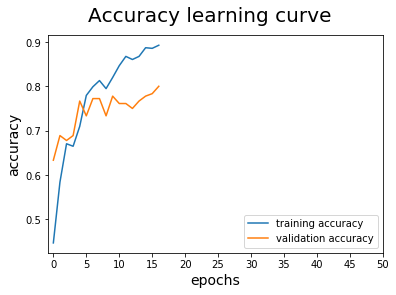

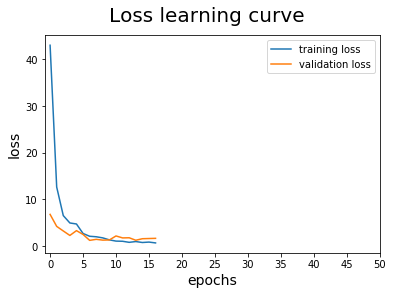

In [12]:
predictions = model.predict(X_test, batch_size=16)

generate_plots(history, EPOCHS)

best_results(history)

In [13]:
labels = [np.argmax(prediction) for prediction in predictions]

y_pred = tf.keras.utils.to_categorical(labels)
np.savetxt("./predictions.csv", y_pred, fmt="%d", delimiter=",")

In [14]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('{}/best_model.h5'.format(model_save_dir))

# Show the model architecture
new_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 15, 20, 512)       14714688  
_________________________________________________________________
flatten (Flatten)            (None, 153600)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               78643712  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
__________________